# Part 6 - Utility functions for the map widget

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Demonstrate-callback-features-with-on_click,-and-on_draw_end" data-toc-modified-id="Demonstrate-callback-features-with-on_click,-and-on_draw_end-1">Demonstrate callback features with <code>on_click</code>, and <code>on_draw_end</code></a></span></li><li><span><a href="#Show-message-in-map-widget-via-display_message" data-toc-modified-id="Show-message-in-map-widget-via-display_message-2">Show message in map widget via <code>display_message</code></a></span></li><li><span><a href="#Hide-the-Map/Scene-Switch-button-using-hide_mode_switch" data-toc-modified-id="Hide-the-Map/Scene-Switch-button-using-hide_mode_switch-3">Hide the Map/Scene Switch button using <code>hide_mode_switch</code></a></span></li><li><span><a href="#Configure-the-map-widget-with-the-Javascript-API-using-set_js_cdn" data-toc-modified-id="Configure-the-map-widget-with-the-Javascript-API-using-set_js_cdn-4">Configure the map widget with the Javascript API using <code>set_js_cdn</code></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

In this notebook, we will explore using utility functions to build interactivity. This can usually be split into two procedures: `call back` and `display message`. The `call back` function can be used to collect `gis` data on screen through digitization, while the `display message` function can be used to prompt users to perform a desired action.

To do this, we will need to setup an asynchronous `callback` function using the `on_click()` or `on_draw_end()` methods to create dynamic, interactive 'apps'. We will need to create a `callback` function, like `function_name(map_inst, geometry)`, with map_inst being the `MapView` instance and geometry being the geometry instance that the user is clicking.

## Demonstrate callback features with `on_click`, and `on_draw_end`

Our first example will take a point that a user clicks on the map, reverse geocode it from the geometry, and print out the resulting location.

Note, you can either create the `GIS` connection using an existing profile, or you can simply enter your username and password, e.g. `gis = GIS("https://www.arcgis.com", "username", "password")`.

In [1]:
from arcgis.gis import GIS
import arcgis.geocoding as geocoding

gis = GIS('home')
callback_map = gis.map('San Diego convention center, San Diego, CA', 16)

In [2]:
def find_addr(callback_map, g):
    try:
        callback_map.draw(g)
        geocoded = geocoding.reverse_geocode(g)
        print(geocoded['address']['Match_addr'])
    except:
        print("Couldn't match address. Try another place...")


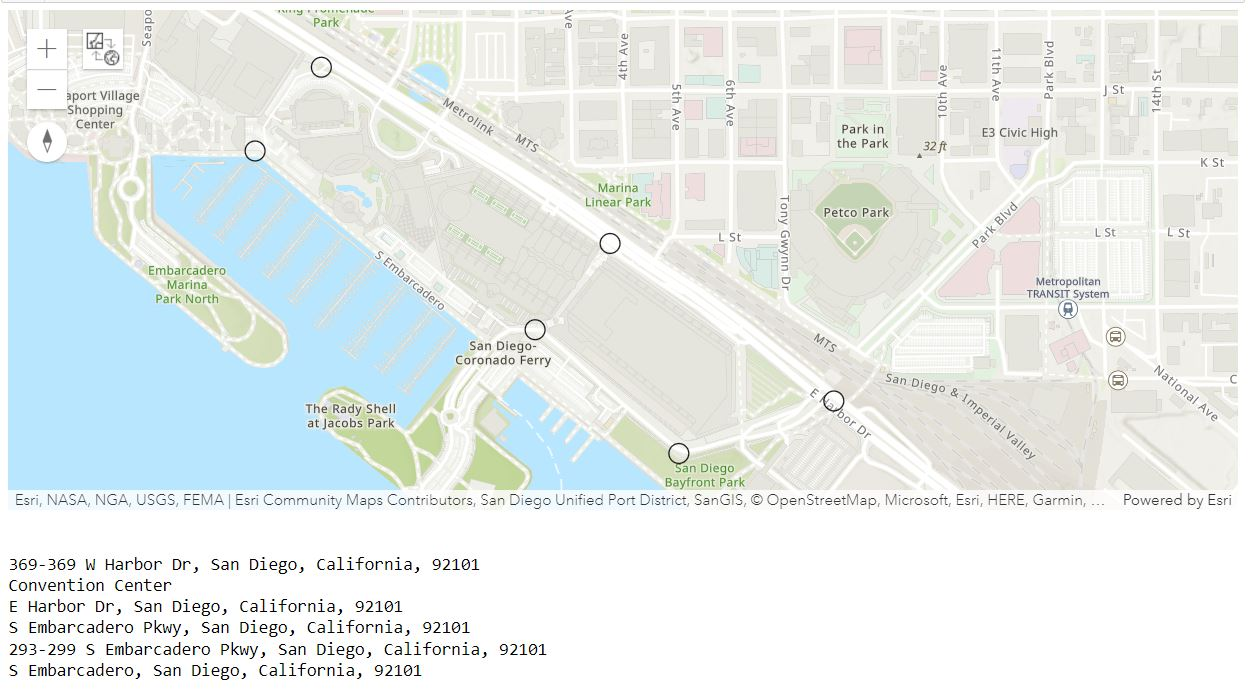

In [25]:
callback_map

In [4]:
callback_map.on_click(find_addr)

Next, we want a user to draw a freehand `polyline` to indicate the paths they take for their runs. When the drawing operation ends, we use the `GIS`'s Geometry service to compute the length of the drawn path. We can do this by adding an event listener to the map widget that gets called when drawing is completed (i.e. `on_draw_end`). The event listener then computes the geodesic length of the drawn geometry using the geometry service and prints it out:

In [9]:
drawend_map = gis.map('San Diego convention center, San Diego, CA', 16)

In [13]:
from arcgis.geometry import lengths

# Define the callback function that computes the length.
def calc_dist(drawend_map, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " mile(s).")


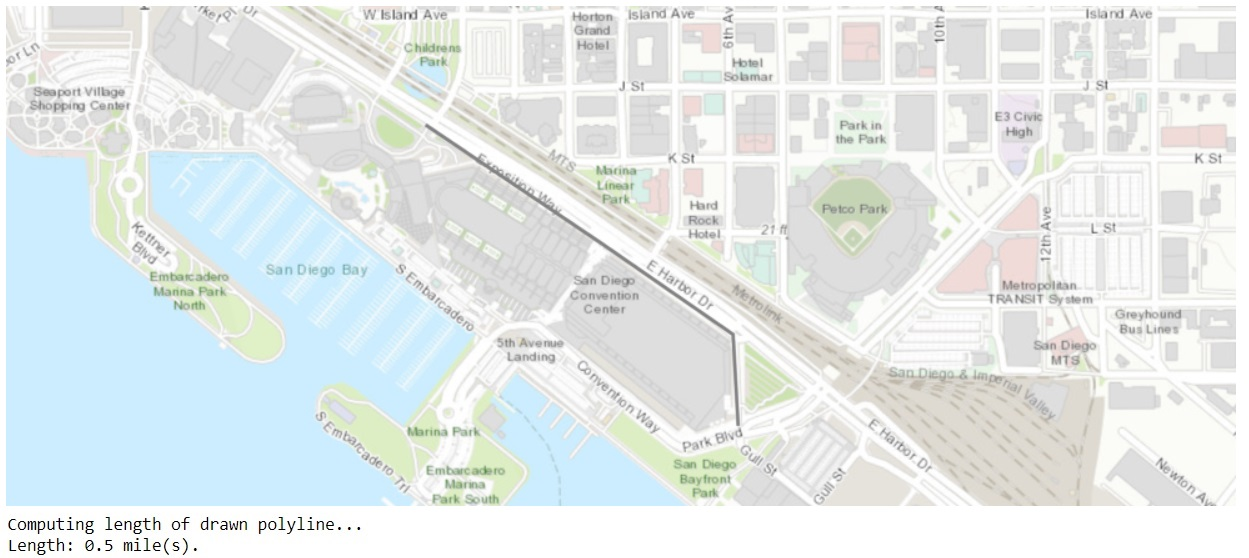

In [27]:
# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
drawend_map.on_draw_end(calc_dist)
drawend_map

In [21]:
drawend_map.draw("polyline")

## Show message in map widget via `display_message`

The `display_message` method displays a message on the upper-right corner of the map widget. 

<div class="alert alert-info">
  <b>Note:</b> Only one message can be sent at a time, and multiple messages will not show up. Let's experiment with the first example by changing the print method to display_message so the desired text output can be shown inside the widget.
</div>


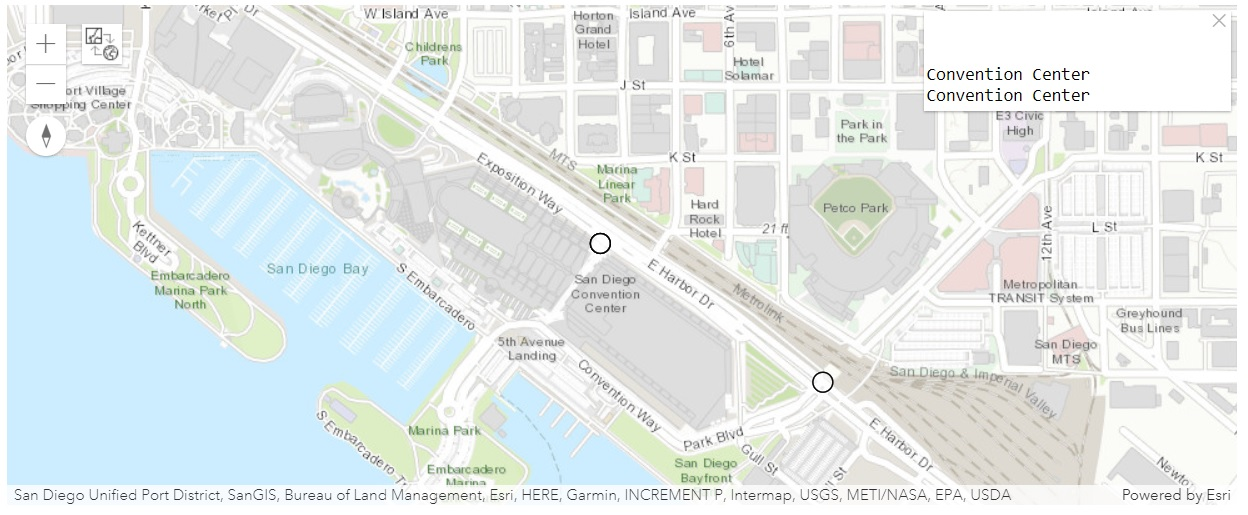

In [26]:
callback_map

In [24]:
def find_addr2(callback_map, g):
    try:
        callback_map.draw(g)
        geocoded = geocoding.reverse_geocode(g)
        callback_map.display_message(geocoded['address']['Match_addr'])
    except:
        callback_map.display_message("Couldn't match address. Try another place...")

In [25]:
callback_map.on_click(find_addr2)

## Hide the Map/Scene Switch button using `hide_mode_switch`

When `hide_mode_switch` is set to `True`, the 2D/3D switch button will be hidden from the widget. 

<div class="alert alert-info">
  <b>Note:</b> Once the button is hidden, it cannot be made visible again. A new `MapView` instance must be created to see the button.
</div>

In [28]:
callback_map.hide_mode_switch = False

## Configure the map widget with the Javascript API using `set_js_cdn`

The `set_js_cdn` function is called before the creation of any `MapView` object, and each instantiated object will use the specified js_cdn parameter as the ArcGIS API for JavaScript CDN URL, rather than the default `http://js.arcgis.com/4.X/`. This functionality is necessary in disconnected environments if the enterprise you are connecting to does not ship with the minimum necessary JavaScript API version.

<div class="alert alert-info">
  <b>Note:</b> You may not need to call this function to view the widget in disconnected environments. For instance, if your computer cannot reach `js.arcgis.com` and you have a `GIS` connection to a portal, the widget will automatically attempt to use that enterprise’s JS API that it ships with.
</div>

For example, if `gis.map()` does not return a map, run the following code to configure the map widget with the Javascript API shipped with the enterprise:

In [24]:
if callback_map.set_js_cdn("https://pythonapi.playground.esri.com/portal/home/10.8.1/js/jsapi") :
    print("True")

True


## Conclusion

In Part 6 of this guide series, we discussed the utility functions of the `MapView` object, particularly in regard to using the `callback` and `display_message` mechanisms in creating interactivity for users.

<a href="#Part-6---Utility-functions-for-the-map-widget">Back to Top</a>